 # Importing Packages

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Examining the Classes

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Define the class names for CIFAR-10
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Display the class names
print("CIFAR-10 Class Names:")
for i, name in enumerate(class_names):
    print(f"{i}: {name}")

# Explore the shape and details of the raw data
print("\nShape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

# Visualize some images with their class labels
def plot_sample_images(X, y, class_names, num_samples=10):
    plt.figure(figsize=(12, 6))
    indices = np.random.choice(range(X.shape[0]), num_samples, replace=False)
    
    for i, idx in enumerate(indices):
        plt.subplot(2, 5, i + 1)
        plot.show()

CIFAR-10 Class Names:
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck

Shape of X_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of X_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


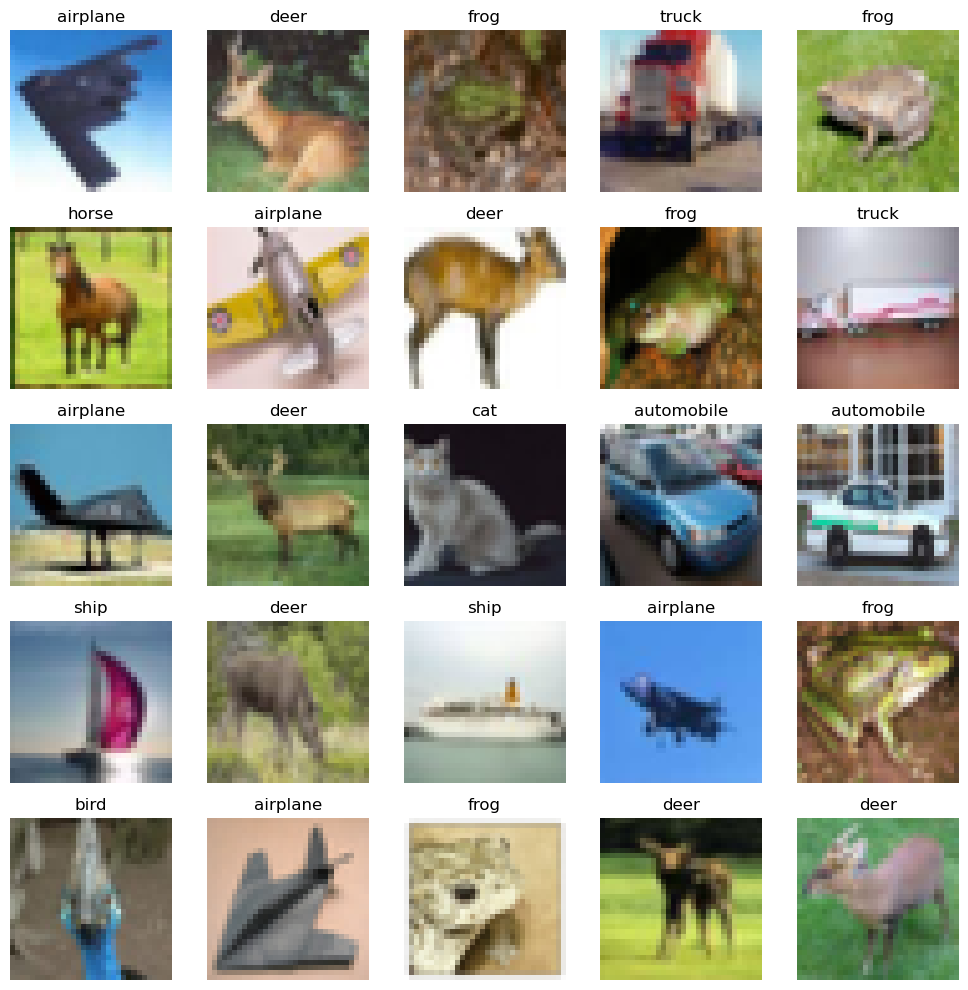

In [36]:
# Function to display a grid of images with their labels
def display_images(images, labels, class_names, num_images=25):
    plt.figure(figsize=(10, 10))
    indices = np.random.choice(range(images.shape[0]), num_images, replace=False)
    
    for i, idx in enumerate(indices):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[idx])
        plt.title(class_names[labels[idx][0]])
        plt.axis("off")
    
    plt.tight_layout()
    plt.show()

# Display 25 random images from the training set
display_images(X_train, y_train, class_names)


# Data Preperation
## Loading and preprocessing the CIFAR-10 dataset

In [21]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()
X_train, X_test = X_train/255.0, X_test/255.0 # Normalize the images

In [27]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [29]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

## Converting Labels to Categorical format

In [4]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [26]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

# Building the model
## Defining the Convolutional Neural Network Model

In [6]:
model = Sequential([
    Conv2D(32,(3,3), activation ='relu', input_shape =(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Conv2D(64,(3,3), activation ='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Conv2D(128,(3,3), activation ='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation ='softmax')
])

In [7]:
model.compile(optimizer ='adam', loss='categorical_crossentropy',metrics =['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 64)       2

## Train the model

In [10]:
history = model.fit(X_train,y_train,epochs=15, batch_size=64, validation_split=0.2)

Epoch 1/15
625/625 [==============================] - 72s 113ms/step - loss: 1.7852 - accuracy: 0.3620 - val_loss: 1.9061 - val_accuracy: 0.3992
Epoch 2/15
625/625 [==============================] - 66s 106ms/step - loss: 1.4208 - accuracy: 0.4872 - val_loss: 1.5365 - val_accuracy: 0.4850
Epoch 3/15
625/625 [==============================] - 65s 104ms/step - loss: 1.2762 - accuracy: 0.5442 - val_loss: 1.1031 - val_accuracy: 0.5970
Epoch 4/15
625/625 [==============================] - 65s 104ms/step - loss: 1.1791 - accuracy: 0.5803 - val_loss: 1.8026 - val_accuracy: 0.4473
Epoch 5/15
625/625 [==============================] - 65s 104ms/step - loss: 1.1094 - accuracy: 0.6089 - val_loss: 1.1371 - val_accuracy: 0.5975
Epoch 6/15
625/625 [==============================] - 64s 103ms/step - loss: 1.0589 - accuracy: 0.6282 - val_loss: 0.9504 - val_accuracy: 0.6598
Epoch 7/15
625/625 [==============================] - 68s 108ms/step - loss: 1.0163 - accuracy: 0.6430 - val_loss: 1.1786 - val_ac

# Evaluating the Model

In [13]:
test_loss, test_accuracy = model.evaluate(X_test,y_test)
print(f"\nTest Accuracy: {test_accuracy*100:.2f}%")

313/313 [==============================] - 5s 17ms/step - loss: 0.8050 - accuracy: 0.7276

Test Accuracy: 72.76%


## Predicting on the test data

In [16]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis =1)
y_true = np.argmax(y_test, axis=1)

313/313 [==============================] - 6s 20ms/step


In [17]:
## Classification Report
print("\nClassification Report: ")
print(classification_report(y_true, y_pred_classes))


Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.71      0.77      1000
           1       0.89      0.83      0.86      1000
           2       0.71      0.52      0.60      1000
           3       0.66      0.37      0.47      1000
           4       0.61      0.78      0.68      1000
           5       0.60      0.71      0.65      1000
           6       0.62      0.92      0.74      1000
           7       0.84      0.71      0.77      1000
           8       0.80      0.87      0.84      1000
           9       0.80      0.87      0.83      1000

    accuracy                           0.73     10000
   macro avg       0.74      0.73      0.72     10000
weighted avg       0.74      0.73      0.72     10000



In [18]:
## Confusion Matrix
conf_matrix = confusion_matrix(y_true,y_pred_classes)

# Plotting the Results

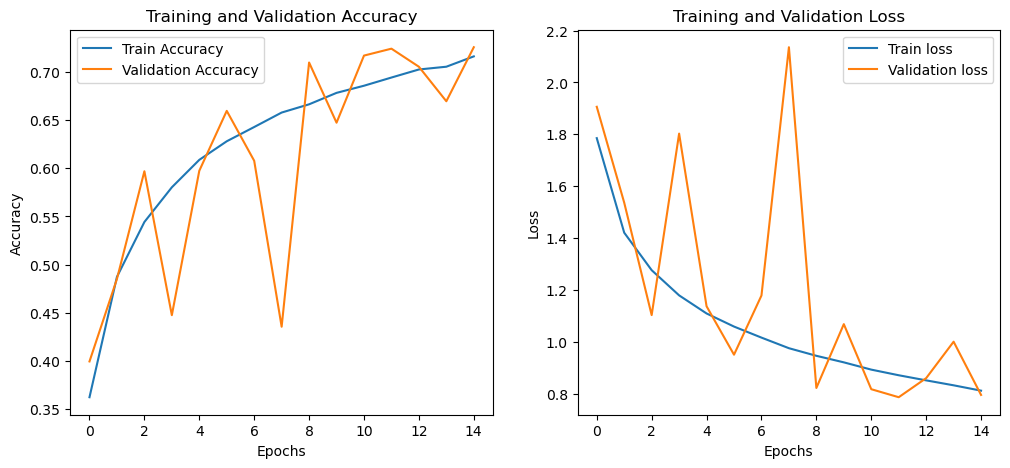

In [19]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

## Confusion Matrix Visualization

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


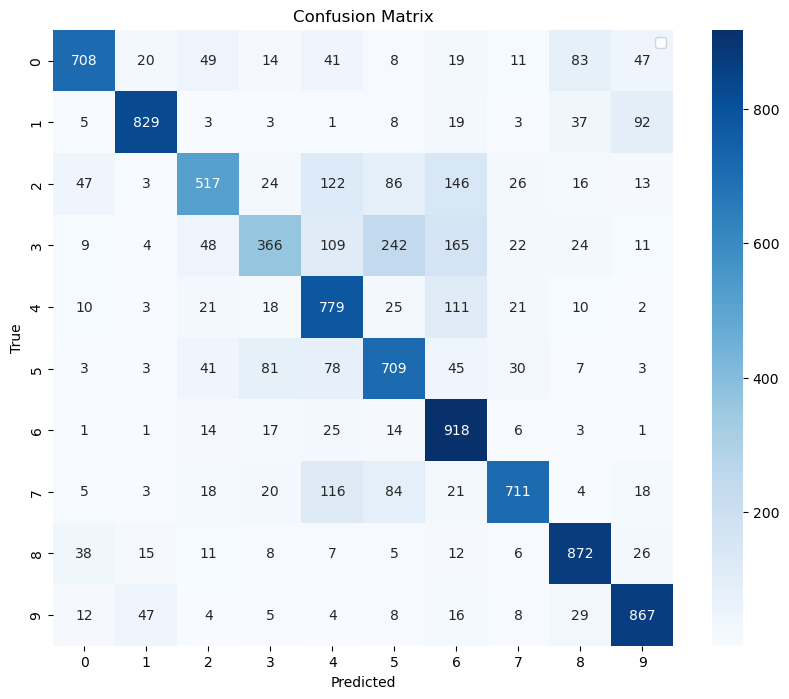

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10),yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.legend()
plt.title('Confusion Matrix')
plt.show()